# 3

In [68]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [69]:
# authentication
consumerKey = 'nAfAiljzt8Ntd1oatjYU2uvKc'
consumerSecret = 'JBJahC7nKS4q853V0vodZ8buaYGHwySv6u5XFm52dlownOqTRm'
accessToken = '4880646753-8TzBk1UEjuvXEXR2XL7uJ2ZFMRZnwNrDOioUHI9'
accessTokenSecret = 'CjAas3cB7A9OW7SJFA6SOkyfgv61MyN59W0g47ZSqBL2b'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [70]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

Enter Keyword/Tag to search about: shahrukh khan
Enter how many tweets to search: 70


In [27]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,He’s a very good man. A very rare and beautifu...
1,ik some south asian armys say that jin reminds...
2,sameera khan are you sister of shahrukh khan? ...
3,@akshaykumar Highest HGOTY in INDIA: Selmon Kh...
4,@ReallySwara If Swaraji can give us an inciden...
...,...
65,Shahrukh khan lied when he said aik tarfa pyaa...
66,@Nishanth_ganesh @RCBTweets Yeah bro then what...
67,How many of u have watched mohabbatain movie o...
68,"Shahrukh Khan Wiki, Age, Family, Movies, HD Ph..."


# 4

In [28]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [29]:
tweet_df.head()

,0,cleaned_data
0,He’s a very good man. A very rare and beautifu...,He s a very good man A very rare and beautiful...
1,ik some south asian armys say that jin reminds...,ik some south asian armys say that jin reminds...
2,sameera khan are you sister of shahrukh khan? ...,sameera khan are you sister of shahrukh khan
3,@akshaykumar Highest HGOTY in INDIA: Selmon Kh...,Highest HGOTY in INDIA Selmon Khan 10 Highest ...
4,@ReallySwara If Swaraji can give us an inciden...,If Swaraji can give us an incident where Shahr...


In [30]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [31]:
tweet_df.head()

,0,cleaned_data
0,He’s a very good man. A very rare and beautifu...,He s a very good man A very rare and beautiful...
1,ik some south asian armys say that jin reminds...,ik some south asian armys say that jin reminds...
2,sameera khan are you sister of shahrukh khan? ...,sameera khan are you sister of shahrukh khan
3,@akshaykumar Highest HGOTY in INDIA: Selmon Kh...,Highest HGOTY in INDIA Selmon Khan Highest HG...
4,@ReallySwara If Swaraji can give us an inciden...,If Swaraji can give us an incident where Shahr...


In [32]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SYS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [35]:
tweet_df['cleaned_data'].values

array(['he s a very good man a very rare and beautiful actor i have yet to see a man who is so contentious about his work',
       'ik some south asian army say that jin reminds them of shahrukh khan and',
       'sameera khan are you sister of shahrukh khan',
       'highest hgoty in india selmon khan highest hgoty in overseas shahrukh khan highest world',
       'if swaraji can give u an incident where shahrukh khan s kid or amir khan s kid or saif ali khan s k',
       'every issue is always directed towards caste or religion just to gain more political advantage here t',
       'khawateen o hazraat presenting a very low budget sasta shahrukh khan ishqmeinmarjawan cap anuu',
       'neha this is raees movie shahrukh khan',
       'total overseas gross of whole career for top star including traditional non tradional market salman khan',
       'can we just all collectively agree that young shahrukh khan wa the absolute hottest man to ever exist',
       'my predicted playing xi of kl

In [36]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [37]:
tweet_df['cleaned_data'].values

array(['good man rare beautiful actor yet see man contentious work',
       'ik south asian army say jin reminds shahrukh khan',
       'sameera khan sister shahrukh khan',
       'highest hgoty india selmon khan highest hgoty overseas shahrukh khan highest world',
       'swaraji give u incident shahrukh khan kid amir khan kid saif ali khan k',
       'every issue always directed towards caste religion gain political advantage',
       'khawateen hazraat presenting low budget sasta shahrukh khan ishqmeinmarjawan cap anuu',
       'neha raees movie shahrukh khan',
       'total overseas gross whole career top star including traditional non tradional market salman khan',
       'collectively agree young shahrukh khan wa absolute hottest man ever exist',
       'predicted playing xi kl rahul cap mayank prabsimran w k gayle pooran shahruk',
       'aamir khan v shahrukh nh opening cr cr opening day weekend st week nd week',
       'reassuring see shahrukh khan picture soon wake morning go

# 5

In [38]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [39]:
tweet_df['polarity'].value_counts()

Neutral              29
Weakly Positive      14
Positive             13
Strongly Positive     6
Weakly Negative       4
Negative              4
Name: polarity, dtype: int64

In [66]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [40]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [42]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.14114965986394554

In [43]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [44]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)



In [50]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on shahrukh khan by analyzing 70 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
18.57% people thought it was positive
20.00% people thought it was weakly positive
8.57% people thought it was strongly positive
5.71% people thought it was negative
5.71% people thought it was weakly negative
0.00% people thought it was strongly negative
41.43% people thought it was neutral


In [55]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

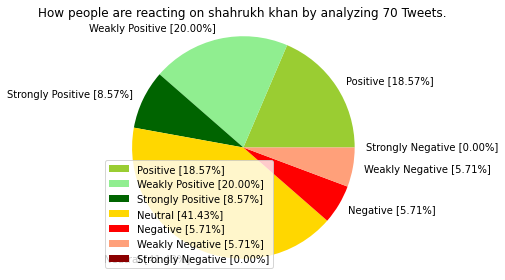

In [60]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()